# Info

La informacion sobre los porque y contexto del proyecto así como su informacion acerca de las variables fue guardada en Github (https://github.com/devFrow/Proyecto_trancitorio.git)
para una mayor comidad a la hora de trabajar con el codigo. 


In [1]:
#importe de librerias y lectura de archivos 

import pandas as pd 
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
import statsmodels.formula.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor

url= 'https://raw.githubusercontent.com/devFrow/Proyecto_trancitorio/main/train.csv'

df = pd.read_csv(url, sep = ',')

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

print(df.shape)
df.head()

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Objetivo "Sale Price" 

count      1460.0
mean     180921.0
std       79443.0
min       34900.0
25%      129975.0
50%      163000.0
75%      214000.0
max      755000.0
Name: SalePrice, dtype: float64


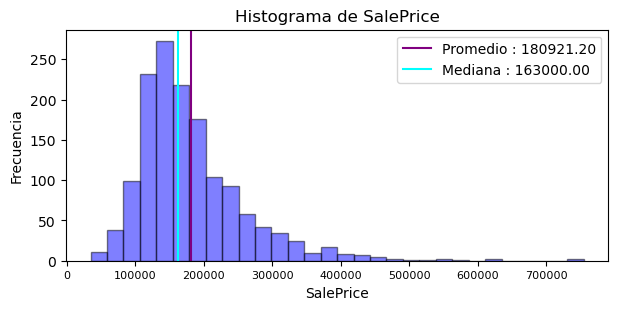

<Figure size 640x480 with 0 Axes>

In [2]:
#Borrando columna id, no la vamos a usar. 
df = df.drop('Id', axis=1)

#Exploracion de la variable objetivo

print(df['SalePrice'].describe().round(0))

#vemos su distribución
promedio = df['SalePrice'].mean()
mediana = df['SalePrice'].median()
plt.figure(figsize=(7,3))
plt.hist(df['SalePrice'], bins=30, color='blue', edgecolor='k', alpha=0.5)
plt.title('Histograma de SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Frecuencia')
plt.xticks(fontsize=8)
plt.axvline(promedio, color='purple', linewidth=1.5, label = f'Promedio : {promedio:.2f}')
plt.axvline(mediana, color='cyan', linewidth=1.5, label = f'Mediana : {mediana:.2f}')
plt.legend()
plt.show()
plt.savefig('Histograma_saleprice.png')

**SalePrice**

La variable objetivo presenta una asimetría con sesgo hacia la derecha y la mayoría de los datos concentrados en valores más bajos, con lo cual voy a aplicar algunas estrategias como: box cox
y trasformación logarítmica para intentar que se parezca más a una distribución normal, ya que ayuda a que los modelos arrojen mejores resultados.

(array([  3.,   2.,   0.,   0.,   4.,   6.,   5.,   4.,  19.,  36.,  33.,
         60., 102., 136., 188., 141., 172., 131.,  96.,  96.,  78.,  42.,
         47.,  22.,  18.,   9.,   2.,   4.,   2.,   2.]),
 array([7.18570211, 7.22651745, 7.26733279, 7.30814813, 7.34896347,
        7.38977882, 7.43059416, 7.4714095 , 7.51222484, 7.55304018,
        7.59385553, 7.63467087, 7.67548621, 7.71630155, 7.75711689,
        7.79793223, 7.83874758, 7.87956292, 7.92037826, 7.9611936 ,
        8.00200894, 8.04282429, 8.08363963, 8.12445497, 8.16527031,
        8.20608565, 8.24690099, 8.28771634, 8.32853168, 8.36934702,
        8.41016236]),
 <BarContainer object of 30 artists>)

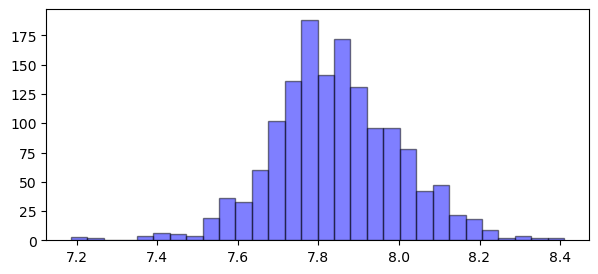

In [3]:
#Tratamos con Box Cox

from scipy import stats
trasf_data, _ = stats.boxcox(df['SalePrice'])
plt.figure(figsize=(7,3))
plt.hist(trasf_data, bins=30, color='blue', edgecolor='k', alpha=0.5)

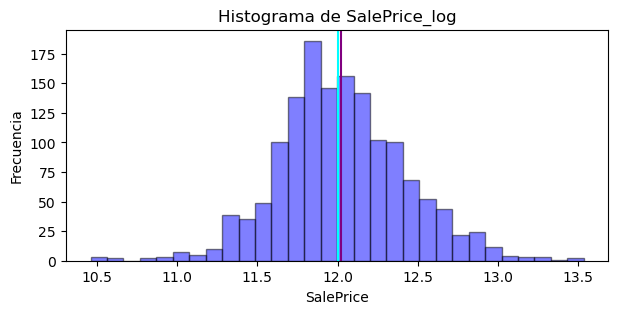

In [4]:
#Tratamos con tras logarítmica 
df['Sale_log'] = np.log(df['SalePrice'])
sale_log = np.log(df['SalePrice'])
plt.figure(figsize=(7,3))
plt.hist(sale_log, bins=30, color='blue', edgecolor='k', alpha=0.5)
plt.title('Histograma de SalePrice_log')
plt.xlabel('SalePrice')
plt.ylabel('Frecuencia')
plt.axvline(sale_log.mean(), color='purple', linewidth=1.5, label = f'Promedio : {promedio:.2f}')
plt.axvline(sale_log.median(), color='cyan', linewidth=1.5, label = f'Mediana : {mediana:.2f}')


**SalePrice** 

Las dos estrategias muestran un buena mejora con respecto a la forma original, voy a usar el log por se mas comun y mas facil la trasformacion de vuelta a valores originales ademas de motrar una media y madiana practicamente iguales.

## Duplicados 

In [5]:
df.duplicated().value_counts()

False    1460
dtype: int64

No hay duplicados procedo a limpieza de Na

## Nulos 

In [6]:
total_nulos = df.isnull().sum()
print(total_nulos[total_nulos != 0 ].sort_values(ascending=False))

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64


### Tratamiento de nulos y categóricas 

**PoolQC**

Hace referician a la calidad de la pileta y los valores que aparecen vacios indicar que la vivienda no tiene pileta.

- Ex   Excellent
- Gd   Good
- TA   Average/Typical
- Fa   Fair
- NA   No Pool

Estos son los posibles valores para PoolQC donde los na representan el hecho de no tener pileta.

0    1453
4       3
5       2
2       2
Name: PoolQC, dtype: int64


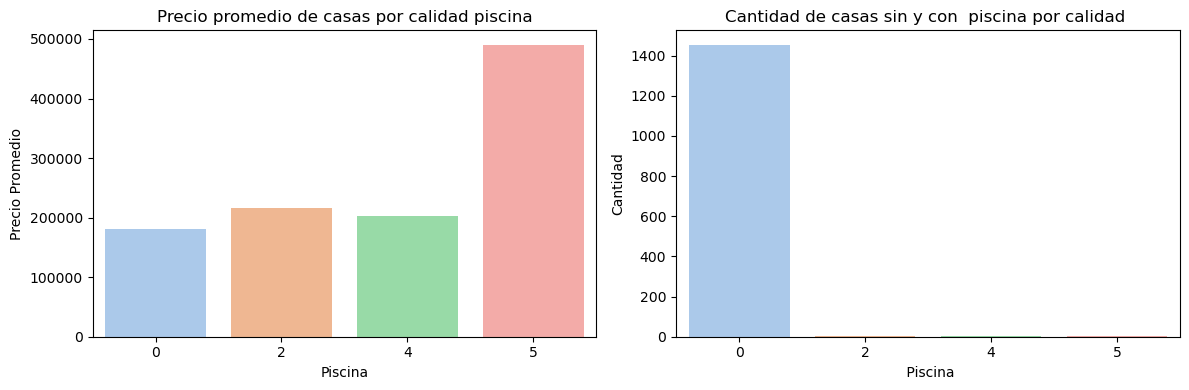

In [7]:
# Llenar los valores nulos en 'PoolQC'
df['PoolQC'].fillna('None', inplace=True)

#Diccionario para usar como mapeo

#Acá agregamos una categoría extra Po  para Poor porque existe en otras categorías que también hacen referencia al estado de alguna parte de la vivienda. 
fact_Qc = {"Ex": 5, "Gd": 4, "TA": 3, "Fa": 2, "Po": 1, "None": 0}
df["PoolQC"] = df['PoolQC'].map(fact_Qc)

print(df['PoolQC'].value_counts())

plt.figure(figsize=(12, 4))

#Grafico 1: Precio promedio
plt.subplot(1, 2, 1)
sns.barplot(x='PoolQC', y='SalePrice', data=df,palette='pastel', errorbar=None)
plt.title('Precio promedio de casas por calidad piscina')
plt.xlabel('Piscina')
plt.ylabel('Precio Promedio')

# Grafico 2: Cantidad de casas
plt.subplot(1, 2, 2)
sns.countplot(x='PoolQC', data=df,palette='pastel')
plt.title('Cantidad de casas sin y con  piscina por calidad ')
plt.xlabel(' Piscina')
plt.ylabel('Cantidad')

plt.tight_layout()
plt.show()

PoolQC podría ser un variable muy buena para predecir el valor de las casas y muestra una correlación con el valor de venta sobre todo en sus extremos, pero esta muy desbalanceada probablemente no se tenga en cuenta para el modelo.

**MiscFeature**

En esta variable se encuentran caracteristicas de la casa demaciado especifcas como ascensor o cancha de tenis, además, no parece ser una cantidad lo suficiente como para tener en cuenta. 


None    1406
Shed      49
Gar2       2
Othr       2
TenC       1
Name: MiscFeature, dtype: int64


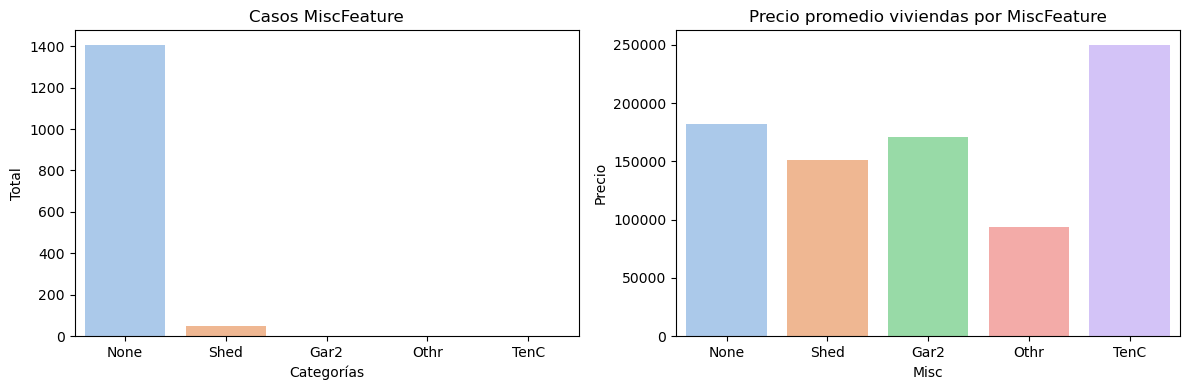

In [8]:
df['MiscFeature'].fillna('None', inplace=True)
print(df["MiscFeature"].value_counts())
cont_misc = df["MiscFeature"].value_counts()

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.countplot(data=df, x='MiscFeature', palette='pastel')
plt.title('Casos MiscFeature')
plt.xlabel('Categorías')
plt.ylabel('Total')

plt.subplot(1,2,2)
sns.barplot(x='MiscFeature', y='SalePrice', data=df,palette='pastel',errorbar=None)
plt.title('Precio promedio viviendas por MiscFeature')
plt.xlabel('Misc')
plt.ylabel('Precio')


plt.tight_layout()
plt.show()

Las que se separa un poco del precio son others que no podemos saber a que se hace referencia no sabemos si el valor de la casa tiene algo que ver y la segunda es cancha de tenis que si puede estar relacionada con el precio porque suelen encontrarse en casa realmente grandes, pero solo hay 2 casos de 1460.

In [9]:
x = cont_misc[:] / cont_misc.sum() *100
print(x)

None    96.301370
Shed     3.356164
Gar2     0.136986
Othr     0.136986
TenC     0.068493
Name: MiscFeature, dtype: float64


Conclucion: 
como cara caracteristica no esta relacionada entre si, si no que son simplemete caracteristicas que no pudieros ser encuadradas en otras
columnas saco los porcentajes que representan cada una por separado y al no superar niguna mas 3.8 % de casas con algunas de esas caracteristicas creo que lo mejor es no tenerla en cuenta para el analisis. 

**Alley**

Esta variable indica si la vivienda tiene un pasaje a la parte trasera de la casa y de que tipo.

- Grvl - Gravel
- Pave - Paved
- NA   - No alley access

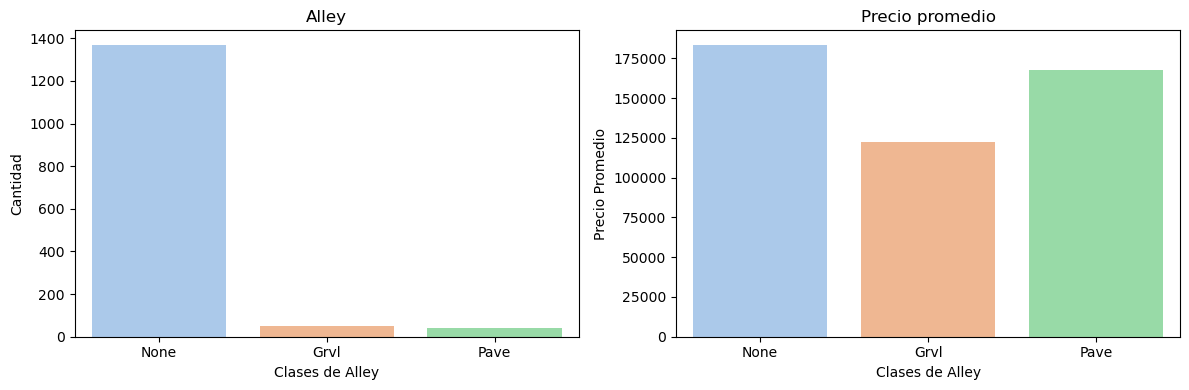

In [10]:
df['Alley'].fillna('None', inplace=True)

plt.figure(figsize=(12,4))

plt.subplot(1, 2, 1)
sns.countplot(x='Alley',data=df,palette='pastel')
plt.title('Alley')
plt.xlabel('Clases de Alley')
plt.ylabel('Cantidad')

plt.subplot(1, 2, 2)
sns.barplot(x='Alley',y='SalePrice',data=df,palette='pastel',errorbar=None)
plt.title('Precio promedio')
plt.xlabel('Clases de Alley')
plt.ylabel('Precio Promedio')

plt.tight_layout()
plt.show()

In [11]:
cont_alley = df["Alley"].value_counts()
x = cont_alley[:] / cont_alley.sum() *100
print(x)

None    93.767123
Grvl     3.424658
Pave     2.808219
Name: Alley, dtype: float64


Como en las otras categorías que presentan demasiados nas la muestra esta muy desbalanceada.

**Fence**

Esta variable habla del vallado.

- GdPrv  - Good Privacy
- MnPrv  - Minimum Privacy
- GdWo   - Good Wood
- MnWw   - Minimum Wood/Wire
- NA     - No Fence

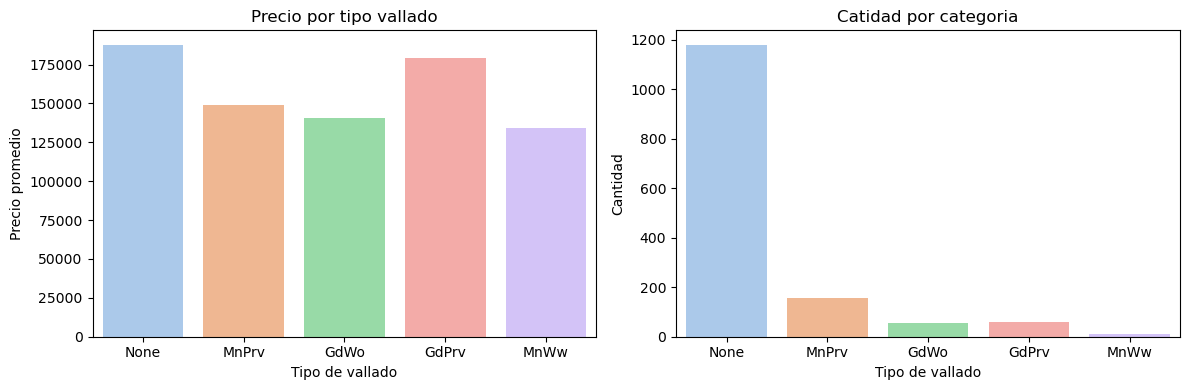

In [12]:
df['Fence'].fillna('None', inplace=True)
plt.figure(figsize=(12, 4))

plt.subplot(1,2,1)
sns.barplot(x=df["Fence"], y=df["SalePrice"], data=df, palette='pastel', errorbar=None)
plt.title('Precio por tipo vallado')
plt.xlabel('Tipo de vallado')
plt.ylabel('Precio promedio')

plt.subplot(1,2,2)
sns.countplot(x='Fence',data=df,palette='pastel')
plt.title('Catidad por categoria')
plt.xlabel('Tipo de vallado')
plt.ylabel('Cantidad')

plt.tight_layout()
plt.show()


Parece no ser una categoria ordinal y tener un cantidad al menos mas representativa que la variable anterior, en este caso voy a usar la estrategia dummies 

In [13]:
cont_fence = df["Fence"].value_counts()
x = cont_fence[:] / cont_fence.sum()*100
print(x)

le = LabelEncoder()
df['Fence_'] = le.fit_transform(df['Fence'])
print("Correlecion con Sale Price:")
print(round(df['Fence_'].corr(df['SalePrice']),4))

None     80.753425
MnPrv    10.753425
GdPrv     4.041096
GdWo      3.698630
MnWw      0.753425
Name: Fence, dtype: float64
Correlecion con Sale Price:
0.1406


En este caso aunque la cantidad es más representativa del total, llegando a un 20%, la correlación entre el precio de venta y los diferentes tipos de vallado es extremadamente baja siendo que no tener vallado tiene el precio medio más alto.

**FirePlaces & FireplaceQu**

Aqui vamos a tratar los nulos en Fireplacequ  que se correlacionan con las casas que no tiene chimenea en Fireplaces en esta esan cargadas como 0. Voy a usar la misma escala que en PoolQC


df['FireplaceQu'].fillna('None',inplace=True)
print(df['FireplaceQu'].value_counts())
print(df['Fireplaces'].value_counts())  

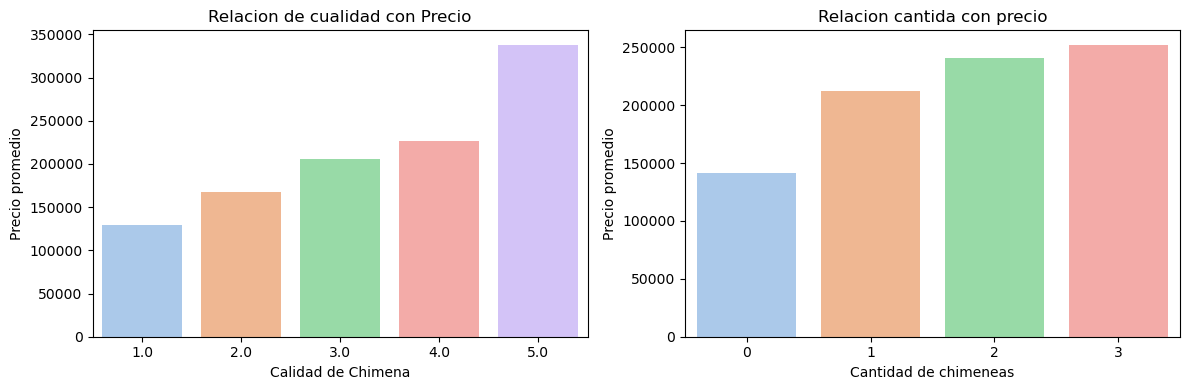

In [14]:
df["FireplaceQu"] = df['FireplaceQu'].map(fact_Qc)

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.barplot(x='FireplaceQu',y='SalePrice',data=df,palette='pastel',errorbar=None)
plt.title('Relacion de cualidad con Precio')
plt.xlabel('Calidad de Chimena')
plt.ylabel('Precio promedio')

plt.subplot(1,2,2)
sns.barplot(x='Fireplaces',y='SalePrice',data=df,palette='pastel', errorbar=None)
plt.title('Relacion cantida con precio')
plt.xlabel('Cantidad de chimeneas')
plt.ylabel('Precio promedio')

plt.tight_layout()
plt.show()

In [15]:
print(df['Fireplaces'].corr(df['SalePrice']))
print(df['FireplaceQu'].corr(df['SalePrice']))

0.4669288367515277
0.29579405100682726


Esta variable esta muy bien para tener en cuenta más adelante la cantidad de datos esta balanceada y tiene una buena correlación con el precio de venta.

***LotFrotage***

Esta variable nos dice cuanto mide el frente de la vivienda en pies cuadrados, la cual tiene 259 valores faltantes, para poder rellenar estos valores faltante vamos a usar KNN, la idea es ver a la casa que tenga el LotArea mas parecido y adjudicarle el mismo valor de lotfront 

In [16]:
from sklearn.impute import KNNImputer

# Seleccionar las columnas relevantes
df_subset = df[['LotFrontage', 'LotArea']]

# Crear un imputador KNN
knn_imputer = KNNImputer(n_neighbors=1)

# Imputar los valores faltantes en 'LotFrontage' basándose en 'LotArea'
df_imputed = pd.DataFrame(knn_imputer.fit_transform(df_subset), columns=['LotFrontage', 'LotArea'])

df['LotFrontage'] = df_imputed['LotFrontage']


**Garage variable**

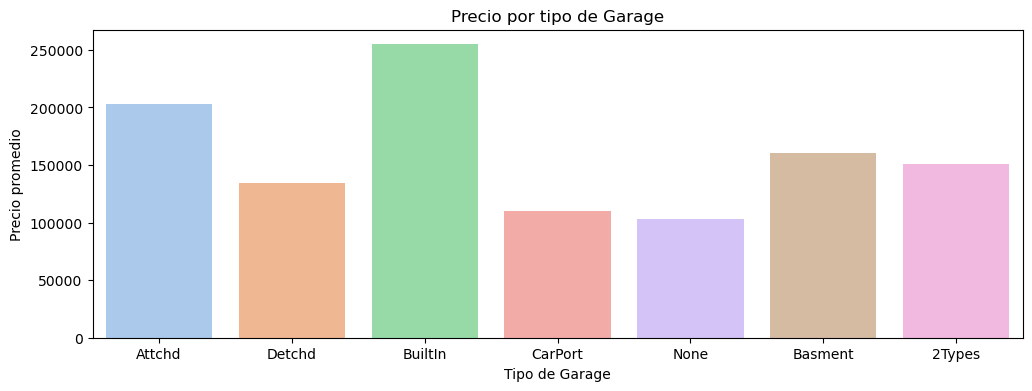

Correlecion con Sale Price:
-0.4153


In [17]:
#garage type
df['GarageType'].fillna('None', inplace = True)
df['GarageType'].value_counts()

plt.figure(figsize=(12,4))
sns.barplot(x='GarageType', y='SalePrice',data=df,palette='pastel',errorbar=None)
plt.title('Precio por tipo de Garage')
plt.xlabel('Tipo de Garage')
plt.ylabel('Precio promedio')
plt.show()

le2 = LabelEncoder()

df['GarageType_'] = le.fit_transform(df['GarageType'])
print("Correlecion con Sale Price:")
print(round(df['GarageType_'].corr(df['SalePrice']),4))

Garagetype no muestra una buena correlación además de no ser una variable ordenada más adelante podría convertirla en una variable binaria (tiene o no tiene) para ver si se comporta mejor

In [18]:
    #GarageYrBlt

df['GarageYrBlt'].fillna(0, inplace=True)

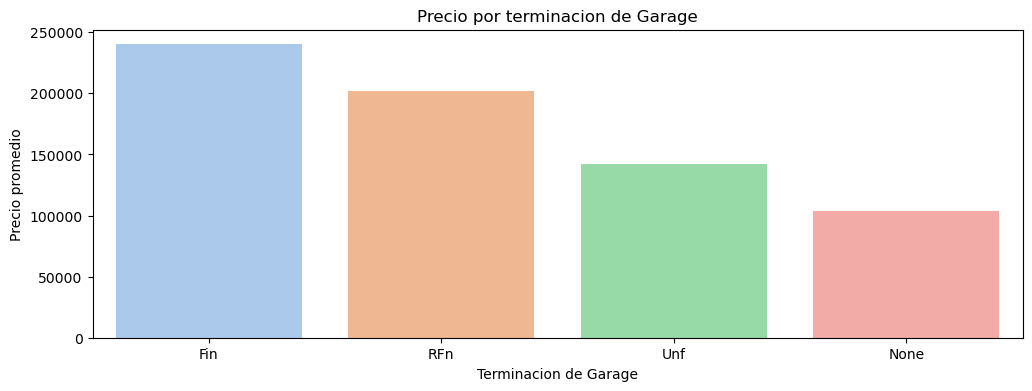

0.5492467563332121


In [19]:
#GarageFinish 
df['GarageFinish'].fillna('None', inplace=True)
df['GarageFinish'].value_counts()
plt.figure(figsize=(12,4))
sns.barplot(x='GarageFinish', y='SalePrice',data=df,palette='pastel',errorbar=None,order=['Fin','RFn','Unf', 'None'])
plt.title('Precio por terminacion de Garage')
plt.xlabel('Terminacion de Garage')
plt.ylabel('Precio promedio')
plt.show()

#reconfig de la variable 

ter_gara = {'None': 0, 'Unf': 1, 'RFn': 2, 'Fin': 3}
df['GarageFinish'] = df['GarageFinish'].map(ter_gara)

print(df['SalePrice'].corr(df['GarageFinish']))

Garagefinish es una varaible ordenada que fue reconfiguarda y muestra una buena correlacion con Sale Price

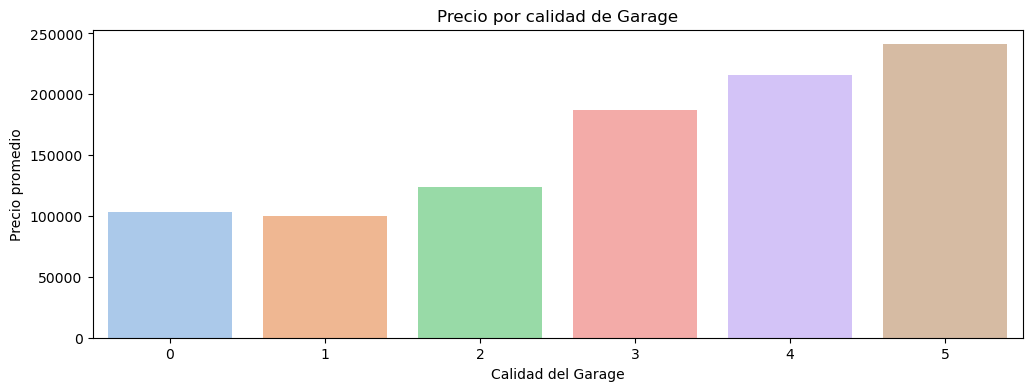

0.273839074006224
3    1311
0      81
2      48
4      14
5       3
1       3
Name: GarageQual, dtype: int64


In [20]:
#garageQual

df['GarageQual'].fillna('None', inplace=True)
df['GarageQual'] = df['GarageQual'].map(fact_Qc)
plt.figure(figsize=(12,4))
sns.barplot(x='GarageQual', y='SalePrice',data=df,palette='pastel',errorbar=None)
plt.title('Precio por calidad de Garage')
plt.xlabel('Calidad del Garage')
plt.ylabel('Precio promedio')
plt.show()
print(df['SalePrice'].corr(df['GarageQual']))

print(df['GarageQual'].value_counts())

GarageQul muentra una correlacion positiva con respecto al precio de venta, pero la muestra esta desbalanceada.

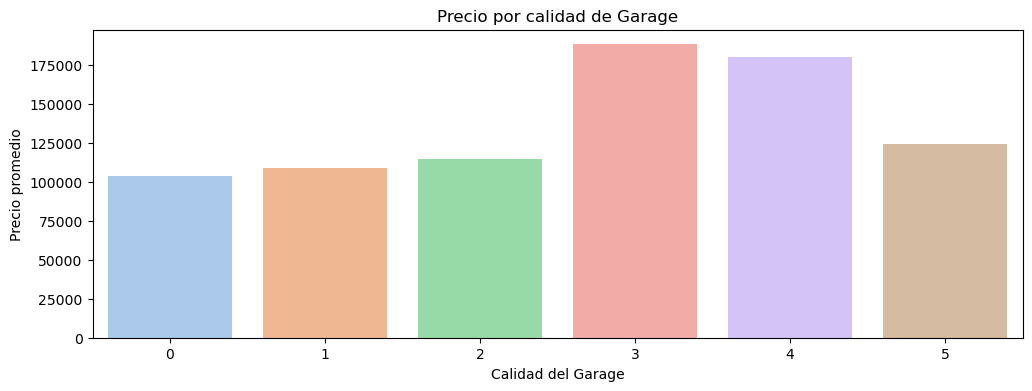

In [21]:
#GarageCond

df['GarageCond'].fillna('None', inplace=True)
df['GarageCond'] = df['GarageCond'].map(fact_Qc)
plt.figure(figsize=(12,4))
sns.barplot(x='GarageCond', y='SalePrice',data=df,palette='pastel',errorbar=None)
plt.title('Precio por calidad de Garage')
plt.xlabel('Calidad del Garage')
plt.ylabel('Precio promedio')
plt.show()

muestra una correlacion difusa como garageQual

In [22]:
# Buscamos los NAs restantes que tienen dif 
condicion = (df['BsmtFinType1'].notna()) & (df['BsmtCond'].isna() | df['BsmtQual'].isna() | df['BsmtExposure'].isna() | df['BsmtFinType2'].isna())

# Seleccionamos las columnas específicas cuando se cumple la condición
resultados = df.loc[condicion, ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']]

# Imprime los resultados
print(resultados)

    BsmtQual BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2
332       Gd       TA           No          GLQ          NaN
948       Gd       TA          NaN          Unf          Unf


In [23]:
df.at[332,'BsmtFinType2'] = 'GLQ'
df.at[948,'BsmtExposure'] = 'No'

No      954
Av      221
Gd      134
Mn      114
None     37
Name: BsmtExposure, dtype: int64


Text(0, 0.5, 'Precio promedio')

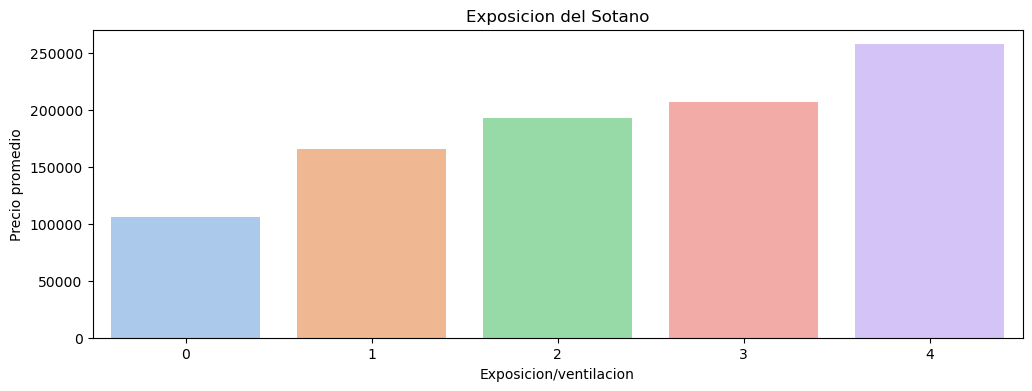

In [24]:
#bsmtExposure
df['BsmtExposure'].fillna('None',inplace= True)
print(df['BsmtExposure'].value_counts())
#es una ordenada vamos a codificar
bsmt_ex_cod = {'None':0,'No':1,'Mn':2,'Av':3,'Gd':4}
df['BsmtExposure'] = df['BsmtExposure'].map(bsmt_ex_cod)
plt.figure(figsize=(12,4))
sns.barplot(x='BsmtExposure', y = 'SalePrice',data=df, palette='pastel',errorbar=None)
plt.title('Exposicion del Sotano')
plt.xlabel('Exposicion/ventilacion')
plt.ylabel('Precio promedio')

In [25]:
#BsmtQual 
df['BsmtQual'].fillna('None',inplace=True)
print(df['BsmtQual'].value_counts())
df['BsmtQual'] = df['BsmtQual'].map(fact_Qc)
print(df['SalePrice'].corr(df['BsmtQual']))

TA      649
Gd      618
Ex      121
None     37
Fa       35
Name: BsmtQual, dtype: int64
0.5852071991725198


In [26]:
#BsmtCond
df['BsmtCond'].fillna('None',inplace=True)
print(df['BsmtCond'].value_counts())
df['BsmtCond'] = df['BsmtCond'].map(fact_Qc)
print(df['SalePrice'].corr(df['BsmtCond']))

TA      1311
Gd        65
Fa        45
None      37
Po         2
Name: BsmtCond, dtype: int64
0.2126071564855789


In [27]:
#BsmtFinType1 y BsmtFinType2 

df['BsmtFinType1'].fillna('None', inplace=True)

df['BsmtFinType2'].fillna('None', inplace=True)

#las dos son viarble ordinales  segun lo que indica su descripcion 

dic_type = { 'None':0,'Unf':1,'Lwq':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6}
df['BsmtFinType1']=df['BsmtFinType1'].map(dic_type)
df['BsmtFinType2']=df['BsmtFinType2'].map(dic_type)

print(df['BsmtFinType1'].value_counts())

1.0    430
6.0    418
5.0    220
4.0    148
3.0    133
0.0     37
Name: BsmtFinType1, dtype: int64


**Mansory**

In [28]:
df['MasVnrType'].fillna('None',inplace=True)
df['MasVnrArea'].fillna(0,inplace=True)

In [29]:
#electrical 
df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])

### -------------------------------------------------------------------------------------------




0.7086244776126522


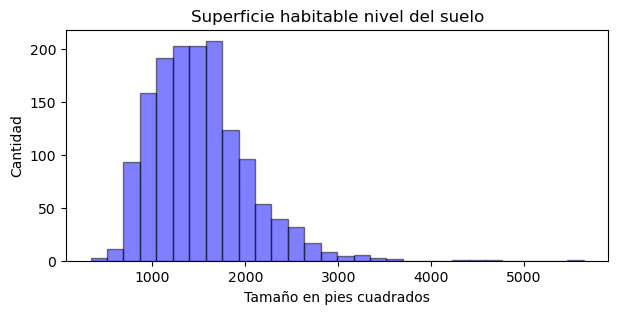

In [30]:
plt.figure(figsize=(7,3))
plt.hist(df['GrLivArea'], bins=30, color='blue', edgecolor='k', alpha=0.5)
plt.title('Superficie habitable nivel del suelo')
plt.ylabel('Cantidad')
plt.xlabel('Tamaño en pies cuadrados')
correlacion = df['SalePrice'].corr(df['GrLivArea'])
print(correlacion)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Sale_log,Fence_,GarageType_
0,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,4,3,1,6.0,706,1.0,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,2,2,548,3,3,Y,0,61,0,0,0,0,0,None,None,0,2,2008,WD,Normal,208500,12.247694,4,1
1,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,4,3,4,5.0,978,1.0,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,3.0,Attchd,1976.0,2,2,460,3,3,Y,298,0,0,0,0,0,0,None,None,0,5,2007,WD,Normal,181500,12.109011,4,1
2,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,4,3,2,6.0,486,1.0,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,3.0,Attchd,2001.0,2,2,608,3,3,Y,0,42,0,0,0,0,0,None,None,0,9,2008,WD,Normal,223500,12.317167,4,1
3,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,3,4,1,5.0,216,1.0,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,4.0,Detchd,1998.0,1,3,642,3,3,Y,0,35,272,0,0,0,0,None,None,0,2,2006,WD,Abnorml,140000,11.849398,4,5
4,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,4,3,3,6.0,655,1.0,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,3.0,Attchd,2000.0,2,3,836,3,3,Y,192,84,0,0,0,0,0,None,None,0,12,2008,WD,Normal,250000,12.429216,4,1


### Feature Engineering 

vamos a trasformar algunas variables para que sean de mas ayuda en el modelo,  la primera va a ser crer una variable llamdada "Age" para calcualar la diferencia del año de venta y el año de remodelacion o cronstuccion
es importante remarcar que el año de remodelacion concide con el de costruccion si no ah habido remodelacioens, con lo cual por practicidad solo usare el año de remodelacion. 


In [34]:
# Calcular la diferencia y asignarla a la nueva columna 'Age'
df['Age'] = pd.to_numeric(df['YrSold']) - df['YearRemodAdd']

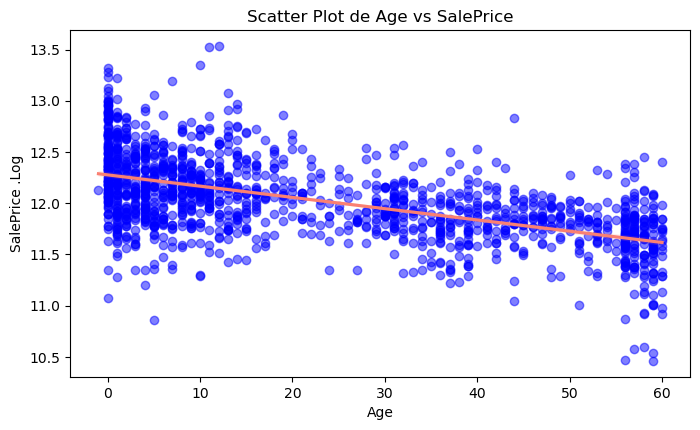

In [35]:

plt.figure(figsize=(8, 4.5))

# Scatter plot con línea de regresión
sns.regplot(data=df, x='Age', y='Sale_log',color='skyblue', scatter_kws={'color': 'blue', 'alpha': 0.5}, line_kws={'color': 'salmon'})

plt.title('Scatter Plot de Age vs SalePrice')
plt.xlabel('Age')
plt.ylabel('SalePrice .Log')
plt.show()

Text(33.51562499999999, 0.5, 'SalePrice')

<Figure size 400x450 with 0 Axes>

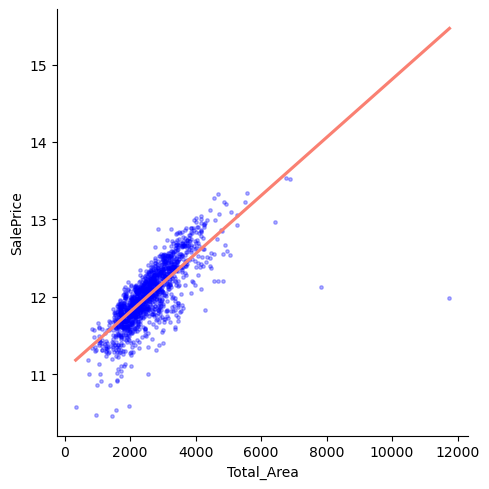

In [36]:
df['Total_Area'] = df['GrLivArea'] + df['TotalBsmtSF']
limite_superior = 7000
df['Total_Area2'] = df['Total_Area'].apply(lambda x: min(x, limite_superior))
df["Total_Area2"].describe()
plt.figure(figsize=(4, 4.5))
sns.lmplot(x='Total_Area', y='Sale_log', data=df, scatter_kws={'color': 'blue', 's': 6, 'alpha': 0.3}, ci=None, line_kws={'color': 'salmon'})

plt.ylabel('SalePrice')

0.7789588289942263


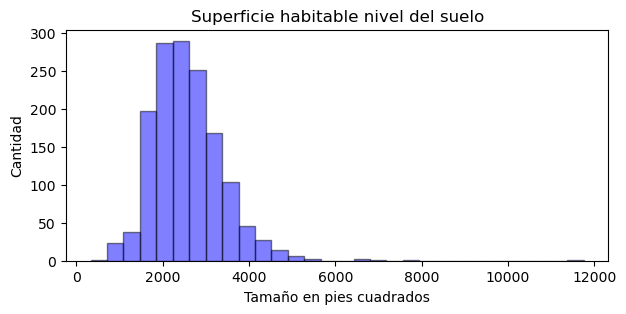

In [ ]:
plt.figure(figsize=(7,3))
plt.hist(df['Total_Area'], bins=30, color='blue', edgecolor='k', alpha=0.5)
plt.title('Superficie habitable nivel del suelo')
plt.ylabel('Cantidad')
plt.xlabel('Tamaño en pies cuadrados')
correlacion = df['SalePrice'].corr(df['Total_Area'])
print(correlacion)

[[1.         0.75888099]
 [0.75888099 1.        ]]


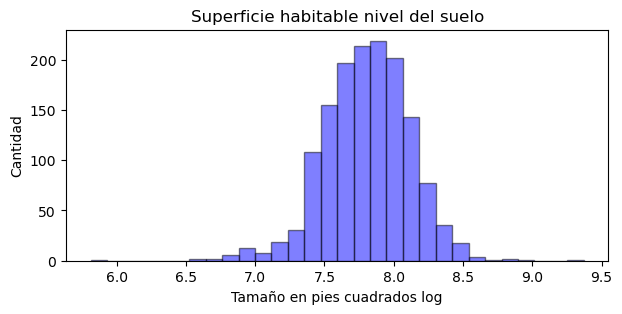

In [ ]:

GLAL = np.log(df['Total_Area'])
plt.figure(figsize=(7,3))
plt.hist(GLAL, bins=30, color='blue', edgecolor='k', alpha=0.5)
plt.title('Superficie habitable nivel del suelo')
plt.ylabel('Cantidad')
plt.xlabel('Tamaño en pies cuadrados log')
correlacion = np.corrcoef(df['SalePrice'], GLAL)
print(correlacion)  

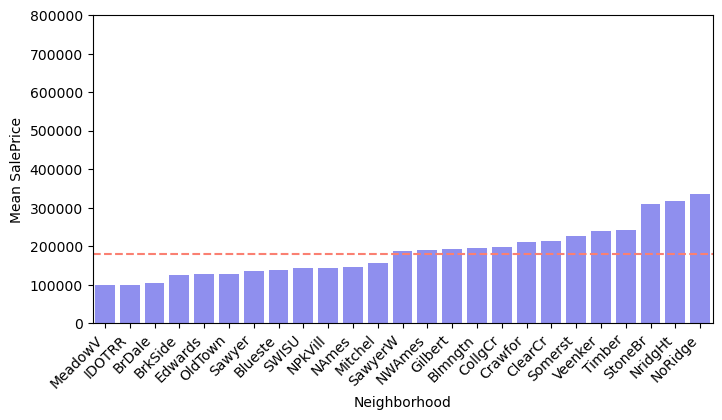

In [ ]:
# Gráfico de barras para el promedio
plt.figure(figsize=(8, 4))
sns.barplot(x=df.groupby('Neighborhood')['SalePrice'].mean().sort_values().index,
            y=df.groupby('Neighborhood')['SalePrice'].mean().sort_values(),
            color='blue',alpha=0.5)
plt.xlabel('Neighborhood')
plt.ylabel('Mean SalePrice')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 800000)
mean_line = df['SalePrice'].mean()
plt.axhline(y=mean_line, linestyle='dashed', color='salmon',  label=f'Median: ${mean_line:,.0f}')


In [ ]:
#bineamso todo en 3 valores posibles 2 = barrio clase alta, 1 = barrios clase media, 0 = barrios clase baja 
df.loc[df['Neighborhood'].isin(['StoneBr', 'NridgHt', 'NoRidge']), 'NeighClass'] = 2
df.loc[~df['Neighborhood'].isin(['MeadowV', 'IDOTRR', 'BrDale', 'StoneBr', 'NridgHt', 'NoRidge']), 'NeighClass'] = 1
df.loc[df['Neighborhood'].isin(['MeadowV', 'IDOTRR', 'BrDale']), 'NeighClass'] = 0

Correlación entre NeighClass y SalePrice: 0.58


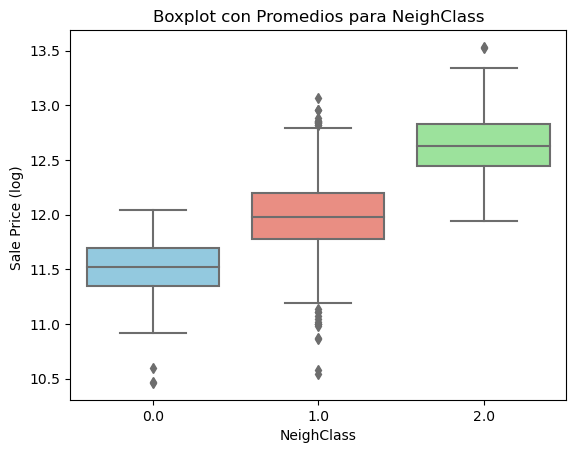

In [ ]:
correlation = df['NeighClass'].corr(df['SalePrice'])
print(f"Correlación entre NeighClass y SalePrice: {correlation:.2f}")
colors = ['skyblue', 'salmon', 'lightgreen']
sns.boxplot(x='NeighClass',y='Sale_log', data=df,palette=colors)
plt.title('Boxplot con Promedios para NeighClass')
plt.xlabel('NeighClass')
plt.ylabel('Sale Price (log) ')
plt.show()

## Random  Forest 

vamos a usar RF para ver cuales son las mejores variable.

FireplaceQu     690
BsmtFinType1     74
BsmtFinType2     46
dtype: int64


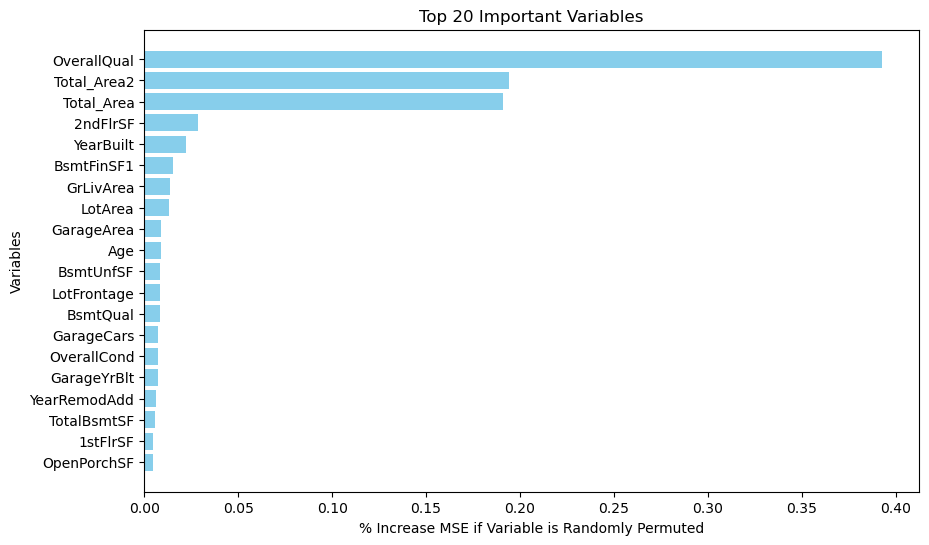

[2.09678440e-03 8.60978037e-03 1.32973044e-02 3.92655782e-01
 7.26400259e-03 2.24087886e-02 6.25622642e-03 3.64696031e-03
 8.26965626e-03 5.45470127e-04 3.13787856e-03 1.52758078e-02
 6.70003600e-04 8.64938012e-03 5.70792126e-03 4.83525197e-03
 2.88883684e-02 1.61880539e-04 1.35707503e-02 1.00823285e-03
 1.89395003e-04 1.45975490e-03 9.31693590e-04 1.38464171e-03
 5.55944266e-04 4.14742978e-03 4.33641926e-03 7.25158768e-03
 2.37675394e-03 7.58409011e-03 8.94869903e-03 5.65524948e-04
 5.93081464e-04 3.41041786e-03 4.66578132e-03 8.14573235e-04
 1.46317304e-04 8.27153065e-04 1.78692222e-04 4.60660600e-04
 7.74466234e-05 4.24159298e-03 1.54902613e-03 5.38778388e-04
 2.37846110e-03 8.75420337e-03 1.90753787e-01 1.93921862e-01]


In [41]:


df_nn = df.select_dtypes(include='number').copy()
df_nn= df_nn.drop(['BsmtFinType1','BsmtFinType2','FireplaceQu','SalePrice','Sale_log'], axis=1)
total_nulos = df.isnull().sum()
print(total_nulos[total_nulos != 0 ].sort_values(ascending=False))


# Crear y entrenar el modelo RandomForest
x = df_nn
y = df['SalePrice']
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(x, y)

# Obtener importancia de las variables
importances = rf_model.feature_importances_
feature_names = x.columns
imp_df = pd.DataFrame({'Variables': feature_names, 'MSE': importances})
imp_df = imp_df.sort_values(by='MSE', ascending=True).reset_index(drop=True)

top_20_variables = imp_df.tail(20)
# Graficar las 20 variables más importantes
plt.figure(figsize=(10, 6))
plt.barh(top_20_variables['Variables'], top_20_variables['MSE'], color='skyblue')
plt.xlabel('% Increase MSE if Variable is Randomly Permuted')
plt.ylabel('Variables')
plt.title('Top 20 Important Variables')
plt.show()

print(rf_model.feature_importances_)

sagasgsadf

In [ ]:
mx_core = df.corr(method='pearson')
mx_t_core = mx_core['SalePrice']
mx_t_core = abs(mx_t_core)
mx_t_core = mx_t_core.drop(columns = 'SalePrice', index = 'SalePrice')
mx_t_core = mx_t_core.drop(columns = 'Sale_log', index = 'Sale_log')
mx_t_core = mx_t_core.sort_values(ascending = False )   

C:\Users\nukke\AppData\Local\Temp\ipykernel_17456\1923946828.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mx_core = df.corr(method='pearson')


vamos a graficar para tener una vista clara del resultado 

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, 'Total_Area2'),
  Text(0, 1, 'OverallQual'),
  Text(0, 2, 'Total_Area'),
  Text(0, 3, 'GrLivArea'),
  Text(0, 4, 'GarageCars'),
  Text(0, 5, 'GarageArea'),
  Text(0, 6, 'TotalBsmtSF'),
  Text(0, 7, '1stFlrSF'),
  Text(0, 8, 'BsmtQual'),
  Text(0, 9, 'NeighClass'),
  Text(0, 10, 'FullBath'),
  Text(0, 11, 'GarageFinish'),
  Text(0, 12, 'TotRmsAbvGrd'),
  Text(0, 13, 'YearBuilt'),
  Text(0, 14, 'Age')])

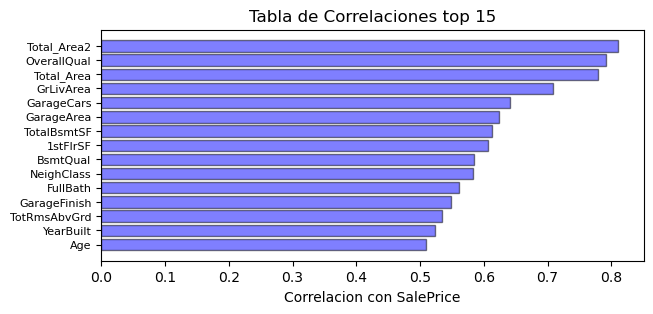

In [ ]:
top_15 = mx_t_core[0:15]
plt.figure(figsize=(7,3))
plt.barh(top_15.index ,top_15.values,color='blue', edgecolor='k', alpha=0.5)
plt.gca().invert_yaxis()
plt.title('Tabla de Correlaciones top 15')
plt.xlabel('Correlacion con SalePrice')
plt.yticks(fontsize=8)

hacemos regresion para una primera vista

In [ ]:
model_r_1 = 'Sale_log ~ OverallQual + GrLivArea + GarageCars + GarageArea + TotalBsmtSF'

rl_m1  = sm.ols(formula=model_r_1, data = df ).fit()

print(rl_m1.summary())
print(rl_m1)
df['pre_1'] = rl_m1.predict(df)

                            OLS Regression Results                            
Dep. Variable:               Sale_log   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     1123.
Date:                Mon, 29 Jan 2024   Prob (F-statistic):               0.00
Time:                        18:31:29   Log-Likelihood:                 423.13
No. Observations:                1460   AIC:                            -834.3
Df Residuals:                    1454   BIC:                            -802.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      10.5798      0.022    488.891      

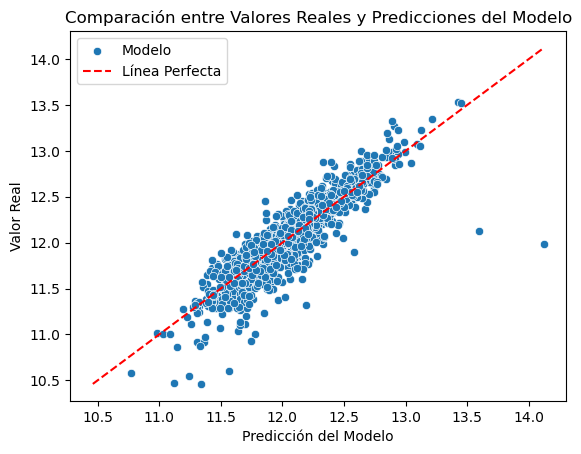

In [ ]:
plt.Figure()
sns.scatterplot(data=df, x='pre_1',y='Sale_log',label='Modelo')
min_val = min(df['Sale_log'].min(), df['pre_1'].min())
max_val = max(df['Sale_log'].max(), df['pre_1'].max())
plt.plot([min_val, max_val], [min_val, max_val], linestyle='--', color='red', label='Línea Perfecta')

plt.title('Comparación entre Valores Reales y Predicciones del Modelo')
plt.xlabel('Predicción del Modelo')
plt.ylabel('Valor Real')
plt.legend()
plt.show()

## Conclusiones

el r2 nos indica que el modelo se comporta bien pero hay que ajustar variable (trasformar las categoricas) para lograr mejoras terminar de corregir nulos, calcular otravez la correlacion 
y volver a provar con las mejores varibles incluso si despues del proceso se amplica la cantidad de variables de calidad usar un PCA para reducir la dimencionalidad 

In [ ]:
model_r_2 = 'Sale_log ~ OverallQual + Total_Area_log + GarageCars  + NeighClass + Age'

rl_m1  = sm.ols(formula=model_r_2, data = df ).fit()

print(rl_m1.summary())
print(rl_m1)
df['pre_1'] = rl_m1.predict(df)

                            OLS Regression Results                            
Dep. Variable:               Sale_log   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     1487.
Date:                Mon, 29 Jan 2024   Prob (F-statistic):               0.00
Time:                        18:32:32   Log-Likelihood:                 590.24
No. Observations:                1460   AIC:                            -1168.
Df Residuals:                    1454   BIC:                            -1137.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          7.2849      0.133     54.

El feature engineering fue de mucha ayuda logramos subir el r2 hasta 0.836

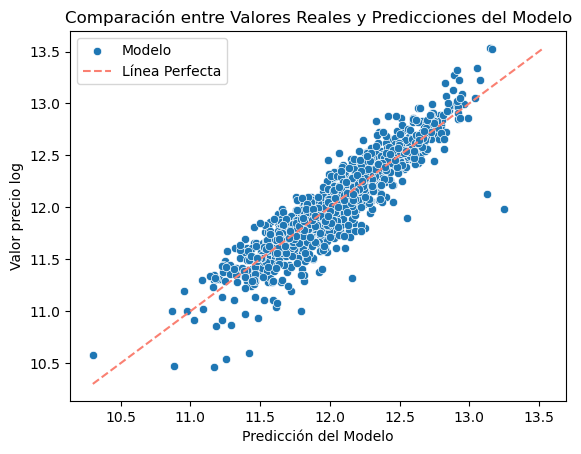

In [ ]:
plt.Figure()
sns.scatterplot(data=df, x='pre_1',y='Sale_log',label='Modelo')
min_val = min(df['Sale_log'].min(), df['pre_1'].min())
max_val = max(df['Sale_log'].max(), df['pre_1'].max())
plt.plot([min_val, max_val], [min_val, max_val], linestyle='--', color='salmon', label='Línea Perfecta')

plt.title('Comparación entre Valores Reales y Predicciones del Modelo')
plt.xlabel('Predicción del Modelo')
plt.ylabel('Valor precio log')
plt.legend()
plt.show()

In [ ]:

# Seleccion varaibles
selected_var = ['OverallQual', 'GarageCars', 'NeighClass', 'Age', 'Sale_log']
df_selected = df[selected_var]

# características (X) y el objetivo (y)
X = df_selected.drop('Sale_log', axis=1)
y = df_selected['Sale_log']

# Escala las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Crea el modelo de regresión Lasso
lasso_model = Lasso(alpha=0.1)  

# Entrena el modelo en toda la muestra
lasso_model.fit(X_scaled, y)

#prediciones 
y_pred = lasso_model.predict(X_scaled)

#coeficiente de determinación (R^2)
r2 = r2_score(y, y_pred)
print(f'Coeficiente de determinación (R^2): {r2}')


Coeficiente de determinación (R^2): 0.6516625762367207


se probo con regresion de tipo lasso pero muestra una peor performance me quedo con lo anterio